In [1]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.getcwd()
assert CWD == os.getcwd()

os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)



In [2]:
xs1, cdf1 = compute_prior_cdf(r = 1, eta = 2, scale = 1, method = 'gamma_cdf', n_samples = 1000, tail_percent = 0.1, tail_bound = 1e-5, 
                                             use_matlab=True, enforce_assert=True, return_assert=False, debug=True, return_xs = True)

Params: 1, 2
Chebyshev bound: 591.6079783099616
Tail samples: 100


100%|██████████| 500/500 [00:13<00:00, 37.62it/s] 

Maximum Diff in y-values: 0.059266919538832896
First CDF value: 0.0
Last CDF value: 1.0
Tail bound: 1e-05
KstestResult(statistic=0.005293508286506349, pvalue=0.940597692815194, statistic_location=-1.3821315742951485, statistic_sign=-1)


In [3]:
xs2, cdf2 = compute_prior_cdf(r = 1, eta = 2, scale = 5, method = 'gamma_cdf', n_samples = 1000, tail_percent = 0.1, tail_bound = 1e-5, 
                                             use_matlab=True, enforce_assert=True, return_assert=False, debug=True, return_xs = True)

Params: 1, 2
Chebyshev bound: 1322.8756555322952
Tail samples: 100


100%|██████████| 500/500 [00:00<00:00, 610.07it/s]

Maximum Diff in y-values: 0.026613140382427347
First CDF value: 0.0
Last CDF value: 1.0
Tail bound: 1e-05
KstestResult(statistic=0.00894846860853564, pvalue=0.39756834982347633, statistic_location=-4.65501594811567, statistic_sign=1)


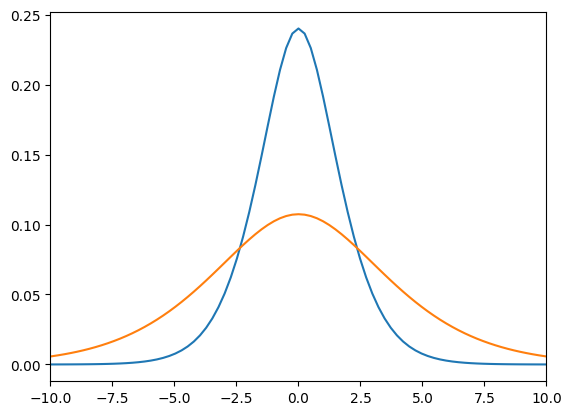

(-10.0, 10.0)

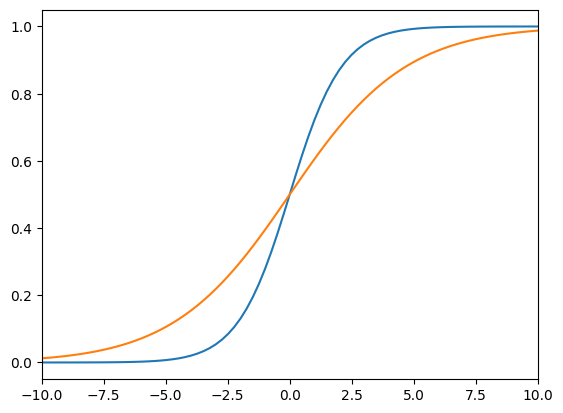

In [4]:
plt.plot(xs1, cdf1.derivative()(xs1))
plt.plot(xs2, cdf2.derivative()(xs2))
plt.xlim(-10, 10)
plt.show()
plt.plot(xs1, cdf1(xs1))
plt.plot(xs2, cdf2(xs2))
plt.xlim(-10, 10)

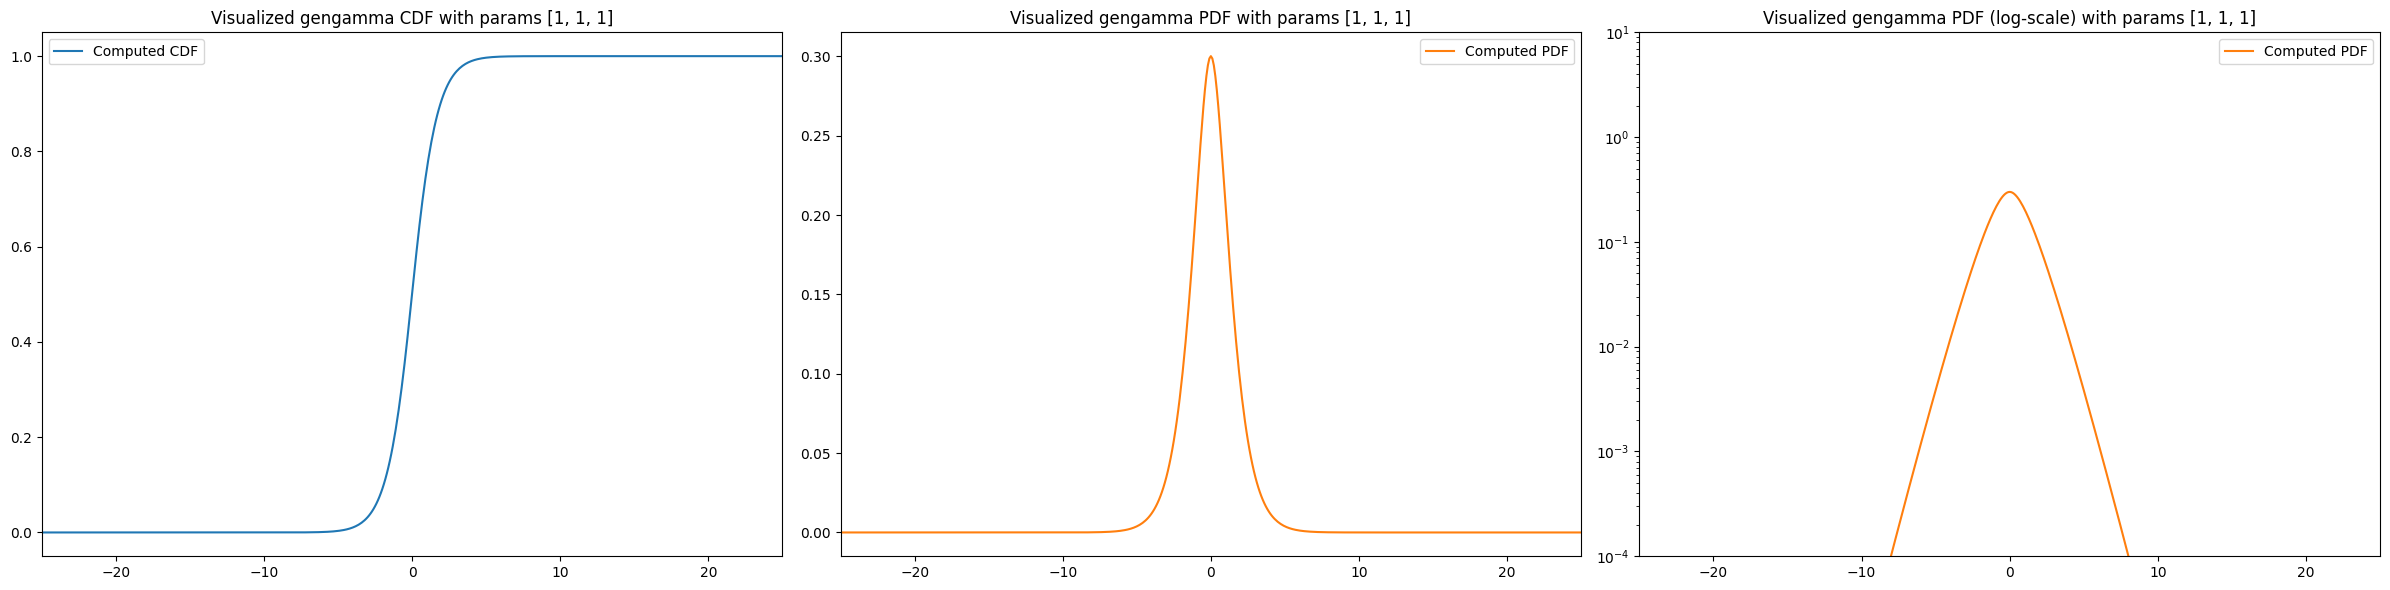

In [5]:
visualize_cdf_pdf([1, 1 ,1]);

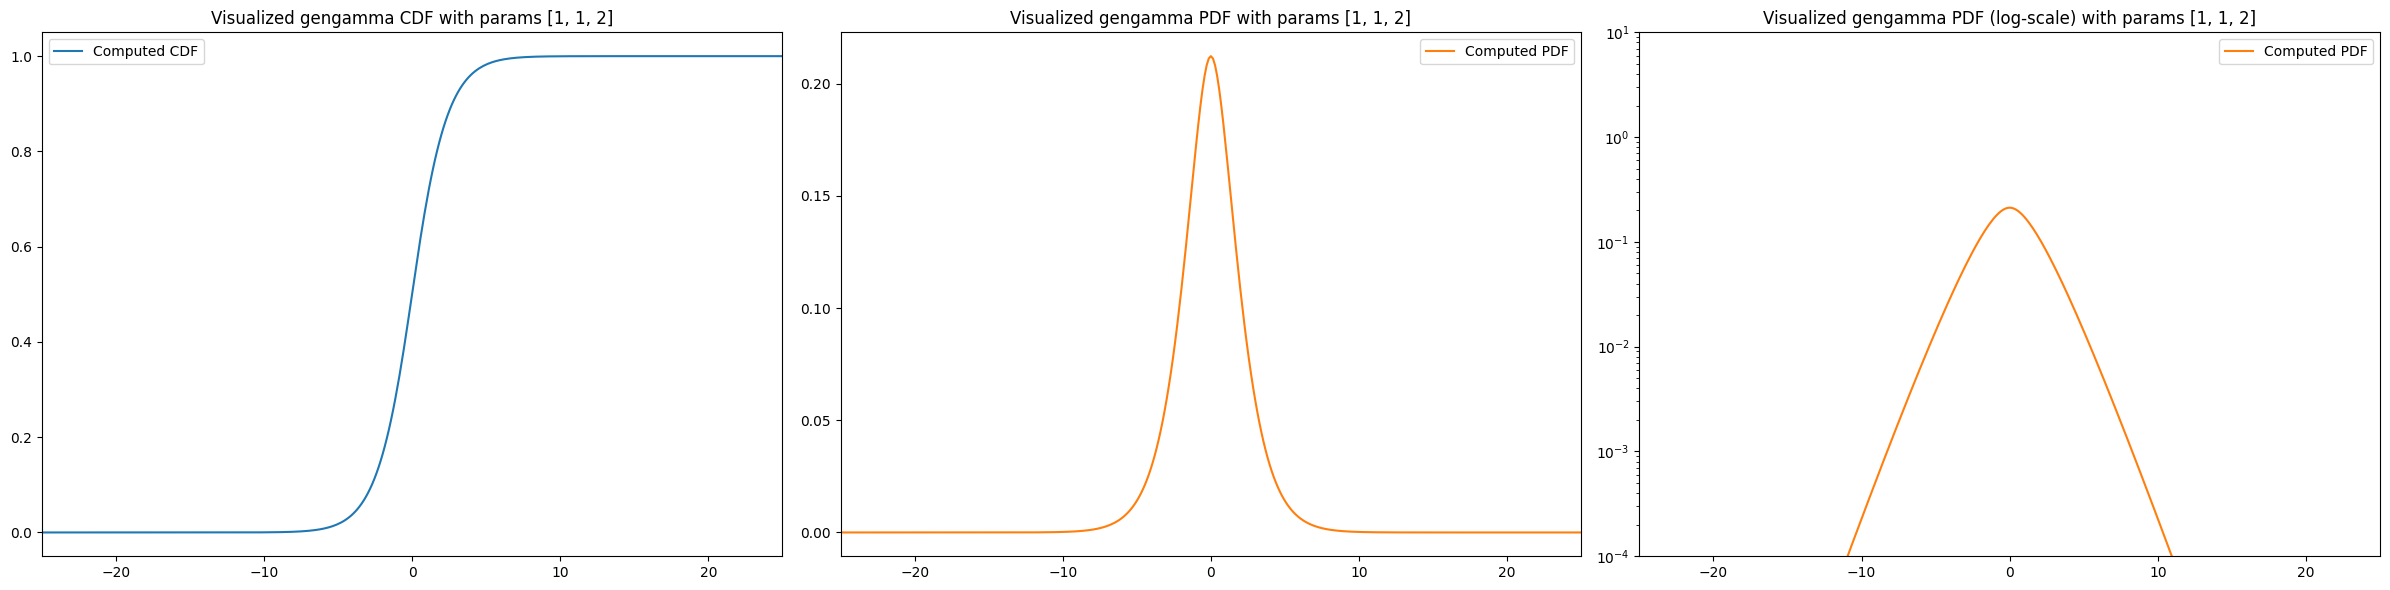

In [6]:
visualize_cdf_pdf([1, 1 ,2]);

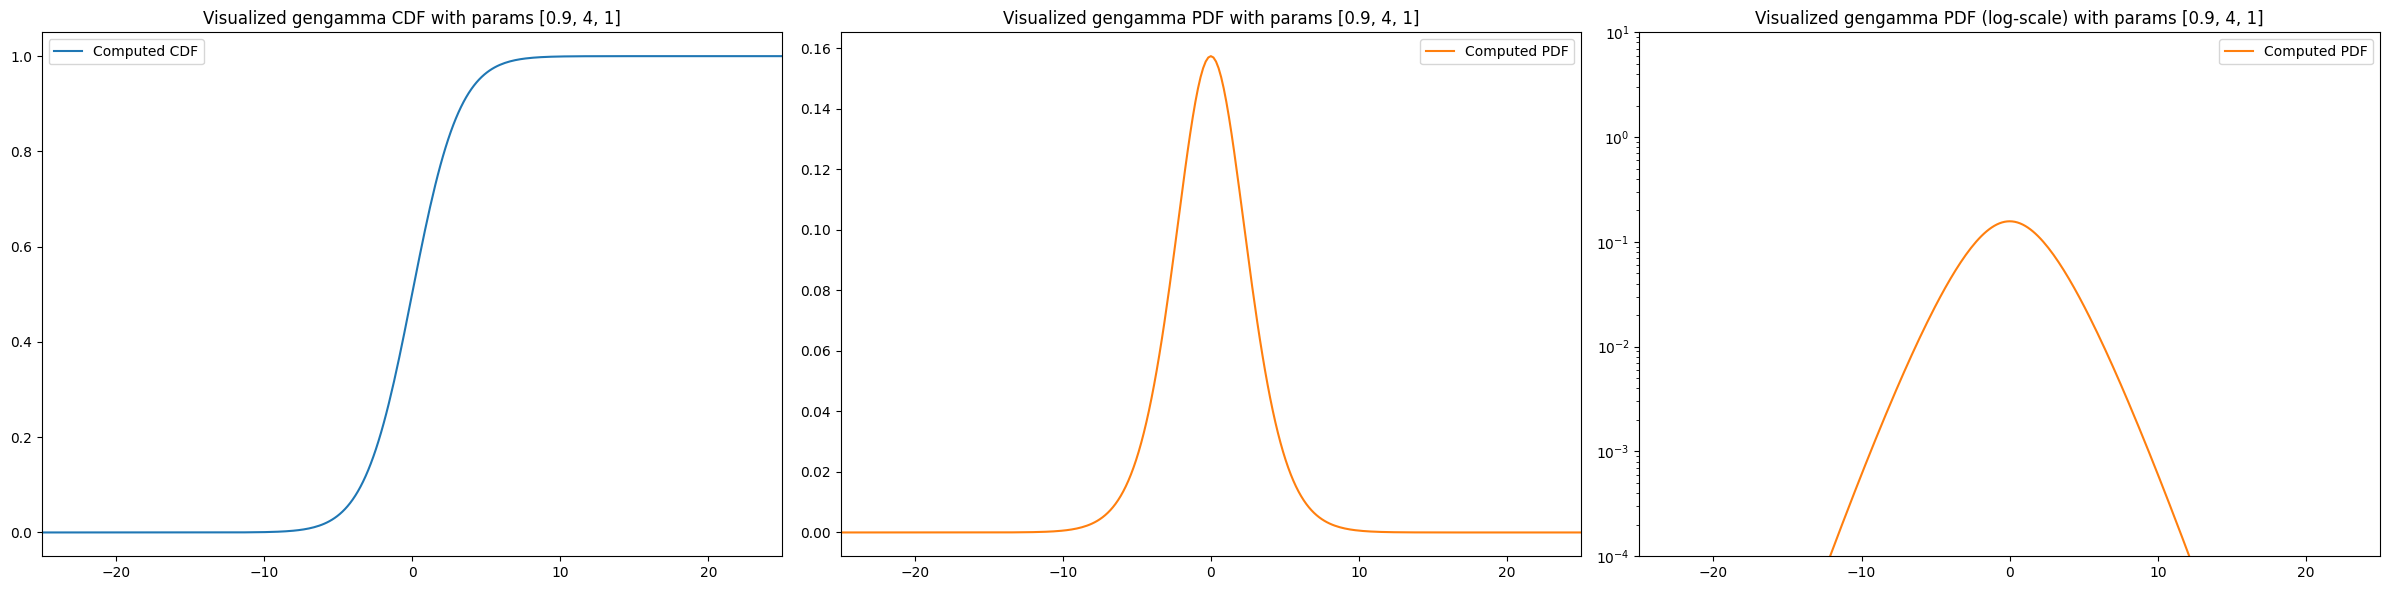

In [7]:
visualize_cdf_pdf([0.9, 4 ,1]);

In [33]:
counter = 0
n = 10000
params = [(round_to_sigfigs(i),round_to_sigfigs(j)) for i in np.arange(0.1, 10.1, 0.1) for j in np.arange(0.1, 10.1, 0.1)]
for i in tqdm(range(n)):
    r = params[i][0]
    eta = params[i][1]
    samp = sample_prior(r, eta, size = 100000, scale = 47)
    stat = stats.ks_1samp(samp/np.sqrt(47), compute_prior_cdf(r, eta, debug = False)).pvalue
    if stat < 0.05:    
        counter+=1
        print(counter, counter/(i+1))
print(f"{counter/n*100}% of Tests failed")

  1%|          | 56/10000 [00:42<2:10:26,  1.27it/s]

1 0.017857142857142856


  1%|          | 75/10000 [00:58<2:26:13,  1.13it/s]

2 0.02666666666666667


  1%|          | 82/10000 [01:04<2:14:06,  1.23it/s]

3 0.036585365853658534


  1%|▏         | 134/10000 [01:43<2:14:01,  1.23it/s]

4 0.029850746268656716


  2%|▏         | 157/10000 [02:00<2:14:21,  1.22it/s]

5 0.03184713375796178


  2%|▏         | 219/10000 [02:49<1:58:50,  1.37it/s]

6 0.0273972602739726


  2%|▏         | 239/10000 [03:06<2:18:54,  1.17it/s]

7 0.029288702928870293


  3%|▎         | 255/10000 [03:20<2:39:18,  1.02it/s]

8 0.03137254901960784


  3%|▎         | 269/10000 [03:30<2:04:49,  1.30it/s]

9 0.03345724907063197


  3%|▎         | 272/10000 [03:32<2:04:05,  1.31it/s]

10 0.03676470588235294


  3%|▎         | 305/10000 [03:57<2:04:38,  1.30it/s]

11 0.036065573770491806


  3%|▎         | 329/10000 [04:17<2:04:03,  1.30it/s]

12 0.0364741641337386


  3%|▎         | 341/10000 [04:27<2:25:10,  1.11it/s]

13 0.03812316715542522


  3%|▎         | 344/10000 [04:30<2:24:04,  1.12it/s]

14 0.040697674418604654


  4%|▎         | 370/10000 [04:56<2:18:49,  1.16it/s]

15 0.04054054054054054


  4%|▍         | 418/10000 [05:32<2:06:34,  1.26it/s]

16 0.03827751196172249


  4%|▍         | 427/10000 [05:39<2:09:58,  1.23it/s]

17 0.03981264637002342


  5%|▍         | 458/10000 [06:04<2:07:48,  1.24it/s]

18 0.039301310043668124


  5%|▍         | 469/10000 [06:12<2:06:36,  1.25it/s]

19 0.04051172707889126


  5%|▍         | 483/10000 [06:23<2:07:01,  1.25it/s]

20 0.041407867494824016


  5%|▍         | 484/10000 [06:24<2:14:09,  1.18it/s]

21 0.04338842975206612


  5%|▌         | 524/10000 [06:57<2:06:33,  1.25it/s]

22 0.04198473282442748


  5%|▌         | 528/10000 [07:00<2:11:02,  1.20it/s]

23 0.043560606060606064


  5%|▌         | 542/10000 [07:14<2:10:52,  1.20it/s]

24 0.04428044280442804


  5%|▌         | 547/10000 [07:18<2:09:40,  1.21it/s]

25 0.04570383912248629


  6%|▌         | 579/10000 [07:45<2:02:33,  1.28it/s]

26 0.044905008635578586


  6%|▌         | 582/10000 [07:48<1:59:38,  1.31it/s]

27 0.04639175257731959


  6%|▌         | 609/10000 [08:08<2:08:37,  1.22it/s]

28 0.04597701149425287


  6%|▌         | 617/10000 [08:15<2:00:30,  1.30it/s]

29 0.04700162074554295


  6%|▋         | 626/10000 [08:22<2:08:27,  1.22it/s]

30 0.04792332268370607


  6%|▋         | 629/10000 [08:24<2:00:02,  1.30it/s]

31 0.0492845786963434


  7%|▋         | 662/10000 [08:49<2:05:43,  1.24it/s]

32 0.04833836858006042


  7%|▋         | 665/10000 [08:52<2:08:29,  1.21it/s]

33 0.04962406015037594


  7%|▋         | 699/10000 [09:17<2:03:13,  1.26it/s]

34 0.04864091559370529


  7%|▋         | 703/10000 [09:20<1:56:18,  1.33it/s]

35 0.049786628733997154


  7%|▋         | 724/10000 [09:36<2:06:49,  1.22it/s]

36 0.049723756906077346


  7%|▋         | 726/10000 [09:37<2:13:18,  1.16it/s]

37 0.05096418732782369


  7%|▋         | 730/10000 [09:40<2:02:29,  1.26it/s]

38 0.052054794520547946


  7%|▋         | 733/10000 [09:43<1:59:21,  1.29it/s]

39 0.05320600272851296


  8%|▊         | 769/10000 [10:12<2:22:22,  1.08it/s]

40 0.05201560468140442


  8%|▊         | 781/10000 [10:21<2:07:04,  1.21it/s]

41 0.052496798975672214


  8%|▊         | 798/10000 [10:34<1:57:32,  1.30it/s]

42 0.05263157894736842


  8%|▊         | 807/10000 [10:41<1:53:50,  1.35it/s]

43 0.05328376703841388


  8%|▊         | 825/10000 [10:54<1:58:10,  1.29it/s]

44 0.05333333333333334


  8%|▊         | 842/10000 [11:08<2:16:47,  1.12it/s]

45 0.05344418052256532


  9%|▉         | 886/10000 [11:43<1:55:38,  1.31it/s]

46 0.05191873589164785


  9%|▉         | 904/10000 [11:57<2:11:34,  1.15it/s]

47 0.051991150442477874


  9%|▉         | 918/10000 [12:08<2:06:36,  1.20it/s]

48 0.05228758169934641


  9%|▉         | 922/10000 [12:11<1:59:43,  1.26it/s]

49 0.05314533622559653


  9%|▉         | 931/10000 [12:18<2:01:33,  1.24it/s]

50 0.05370569280343716


 10%|▉         | 976/10000 [12:52<1:51:10,  1.35it/s]

51 0.05225409836065574


 10%|█         | 1029/10000 [13:35<2:12:10,  1.13it/s]

52 0.05053449951409135


 10%|█         | 1050/10000 [13:51<2:01:02,  1.23it/s]

53 0.05047619047619047


 11%|█         | 1058/10000 [13:58<2:08:17,  1.16it/s]

54 0.05103969754253308


 11%|█         | 1060/10000 [14:00<2:14:43,  1.11it/s]

55 0.05188679245283019


 11%|█         | 1071/10000 [14:09<2:05:19,  1.19it/s]

56 0.05228758169934641


 11%|█         | 1096/10000 [14:28<1:58:43,  1.25it/s]

57 0.05200729927007299


 12%|█▏        | 1160/10000 [15:17<1:57:55,  1.25it/s]

58 0.05


 12%|█▏        | 1167/10000 [15:22<1:54:44,  1.28it/s]

59 0.050556983718937444


 12%|█▏        | 1226/10000 [16:07<1:57:34,  1.24it/s]

60 0.048939641109298535


 12%|█▏        | 1231/10000 [16:11<1:51:10,  1.31it/s]

61 0.04955320877335499


 12%|█▎        | 1250/10000 [16:26<1:56:51,  1.25it/s]

62 0.0496


 13%|█▎        | 1257/10000 [16:31<1:48:41,  1.34it/s]

63 0.050119331742243436


 13%|█▎        | 1269/10000 [16:41<2:04:50,  1.17it/s]

64 0.0504334121355398


 13%|█▎        | 1274/10000 [16:45<1:59:51,  1.21it/s]

65 0.05102040816326531


 13%|█▎        | 1275/10000 [16:45<2:03:02,  1.18it/s]

66 0.05176470588235294


 13%|█▎        | 1317/10000 [17:17<1:46:11,  1.36it/s]

67 0.05087319665907365


 13%|█▎        | 1345/10000 [17:37<1:45:10,  1.37it/s]

68 0.05055762081784387


 13%|█▎        | 1347/10000 [17:39<1:55:03,  1.25it/s]

69 0.051224944320712694


 14%|█▍        | 1382/10000 [18:05<1:46:11,  1.35it/s]

70 0.05065123010130246


 14%|█▍        | 1391/10000 [18:11<1:46:29,  1.35it/s]

71 0.051042415528396834


 15%|█▍        | 1456/10000 [19:00<1:53:51,  1.25it/s]

72 0.04945054945054945


 15%|█▍        | 1473/10000 [19:13<1:56:07,  1.22it/s]

73 0.04955872369314324


 15%|█▍        | 1491/10000 [19:27<1:53:57,  1.24it/s]

74 0.04963112005365526


 15%|█▌        | 1518/10000 [19:49<2:08:57,  1.10it/s]

75 0.04940711462450593


 15%|█▌        | 1547/10000 [20:13<2:08:14,  1.10it/s]

76 0.0491273432449903


 16%|█▌        | 1585/10000 [20:42<2:01:03,  1.16it/s]

77 0.04858044164037855


 16%|█▌        | 1598/10000 [20:52<1:30:21,  1.55it/s]

78 0.04881101376720901


 16%|█▋        | 1640/10000 [21:19<1:48:37,  1.28it/s]

79 0.048170731707317074


 16%|█▋        | 1646/10000 [21:23<1:38:26,  1.41it/s]

80 0.04860267314702309


 17%|█▋        | 1683/10000 [21:47<1:28:12,  1.57it/s]

81 0.0481283422459893


 17%|█▋        | 1739/10000 [22:23<1:35:55,  1.44it/s]

82 0.047153536515238646


 18%|█▊        | 1753/10000 [22:32<1:35:21,  1.44it/s]

83 0.047347404449515115


 18%|█▊        | 1761/10000 [22:37<1:35:25,  1.44it/s]

84 0.04770017035775128


 18%|█▊        | 1770/10000 [22:43<1:28:03,  1.56it/s]

85 0.0480225988700565


 18%|█▊        | 1779/10000 [22:49<1:35:53,  1.43it/s]

86 0.04834176503653738


 18%|█▊        | 1792/10000 [22:58<1:34:26,  1.45it/s]

87 0.048549107142857144


 18%|█▊        | 1796/10000 [23:00<1:36:24,  1.42it/s]

88 0.04899777282850779


 18%|█▊        | 1828/10000 [23:21<1:33:05,  1.46it/s]

89 0.048687089715536105


 18%|█▊        | 1831/10000 [23:23<1:29:27,  1.52it/s]

90 0.049153468050245765


 18%|█▊        | 1842/10000 [23:30<1:26:24,  1.57it/s]

91 0.0494028230184582


 18%|█▊        | 1843/10000 [23:30<1:34:26,  1.44it/s]

92 0.049918610960390665


 18%|█▊        | 1850/10000 [23:35<1:26:54,  1.56it/s]

93 0.05027027027027027


 19%|█▊        | 1863/10000 [23:43<1:25:58,  1.58it/s]

94 0.05045625335480408


 19%|█▉        | 1886/10000 [23:58<1:25:42,  1.58it/s]

95 0.0503711558854719


 19%|█▉        | 1898/10000 [24:06<1:25:24,  1.58it/s]

96 0.0505795574288725


 19%|█▉        | 1913/10000 [24:15<1:23:38,  1.61it/s]

97 0.05070569785676947


 19%|█▉        | 1931/10000 [24:26<1:24:18,  1.60it/s]

98 0.050750906266183324


 19%|█▉        | 1942/10000 [24:33<1:24:41,  1.59it/s]

99 0.0509783728115345


 19%|█▉        | 1946/10000 [24:36<1:31:59,  1.46it/s]

100 0.051387461459403906


 20%|█▉        | 1957/10000 [24:43<1:23:42,  1.60it/s]

101 0.0516096065406234


 20%|█▉        | 1990/10000 [25:04<1:23:32,  1.60it/s]

102 0.05125628140703518


 20%|██        | 2001/10000 [25:11<1:23:32,  1.60it/s]

103 0.05147426286856572


 20%|██        | 2004/10000 [25:13<1:24:56,  1.57it/s]

104 0.05189620758483034


 20%|██        | 2040/10000 [25:36<1:32:16,  1.44it/s]

105 0.051470588235294115


 21%|██        | 2094/10000 [26:10<1:30:12,  1.46it/s]

106 0.050620821394460364


 21%|██▏       | 2132/10000 [26:35<1:29:48,  1.46it/s]

107 0.05018761726078799


 22%|██▏       | 2151/10000 [26:47<1:22:10,  1.59it/s]

108 0.0502092050209205


 22%|██▏       | 2162/10000 [26:54<1:23:15,  1.57it/s]

109 0.05041628122109158


 22%|██▏       | 2209/10000 [27:24<1:21:57,  1.58it/s]

110 0.04979628791308284


 22%|██▏       | 2226/10000 [27:34<1:21:34,  1.59it/s]

111 0.04986522911051213


 23%|██▎       | 2286/10000 [28:12<1:21:14,  1.58it/s]

112 0.048993875765529306


 23%|██▎       | 2308/10000 [28:26<1:21:19,  1.58it/s]

113 0.048960138648180246


 23%|██▎       | 2321/10000 [28:35<1:20:58,  1.58it/s]

114 0.04911676001723395


 23%|██▎       | 2331/10000 [28:41<1:21:39,  1.57it/s]

115 0.049335049335049334


 23%|██▎       | 2339/10000 [28:46<1:20:55,  1.58it/s]

116 0.04959384352287302


 24%|██▍       | 2376/10000 [29:10<1:27:12,  1.46it/s]

117 0.04924242424242424


 24%|██▍       | 2392/10000 [29:20<1:20:00,  1.58it/s]

118 0.04933110367892977


 24%|██▍       | 2407/10000 [29:30<1:27:32,  1.45it/s]

119 0.04943913585375987


 24%|██▍       | 2409/10000 [29:31<1:30:57,  1.39it/s]

120 0.049813200498132


 24%|██▍       | 2450/10000 [29:57<1:19:57,  1.57it/s]

121 0.04938775510204082


 25%|██▍       | 2463/10000 [30:06<1:26:36,  1.45it/s]

122 0.04953308972797402


 25%|██▍       | 2474/10000 [30:13<1:19:48,  1.57it/s]

123 0.049717057396928055


 25%|██▍       | 2486/10000 [30:20<1:26:22,  1.45it/s]

124 0.0498793242156074


 25%|██▍       | 2488/10000 [30:22<1:23:08,  1.51it/s]

125 0.050241157556270094


 25%|██▌       | 2510/10000 [30:36<1:19:42,  1.57it/s]

126 0.050199203187251


 25%|██▌       | 2515/10000 [30:39<1:20:10,  1.56it/s]

127 0.05049701789264414


 25%|██▌       | 2519/10000 [30:42<1:26:14,  1.45it/s]

128 0.05081381500595474


 25%|██▌       | 2526/10000 [30:46<1:23:49,  1.49it/s]

129 0.0510688836104513


 25%|██▌       | 2529/10000 [30:48<1:27:56,  1.42it/s]

130 0.051403716884143934


 25%|██▌       | 2532/10000 [30:50<1:22:08,  1.52it/s]

131 0.05173775671406003


 25%|██▌       | 2535/10000 [30:53<1:28:12,  1.41it/s]

132 0.05207100591715976


 26%|██▌       | 2567/10000 [31:13<1:25:37,  1.45it/s]

133 0.05181145305804441


 26%|██▌       | 2575/10000 [31:19<1:37:00,  1.28it/s]

134 0.05203883495145631


 26%|██▌       | 2585/10000 [31:26<1:38:56,  1.25it/s]

135 0.05222437137330754


 26%|██▌       | 2593/10000 [31:32<1:31:35,  1.35it/s]

136 0.05244890088700347


 26%|██▋       | 2638/10000 [32:06<1:37:29,  1.26it/s]

137 0.051933282789992416


 26%|██▋       | 2647/10000 [32:13<1:31:35,  1.34it/s]

138 0.05213449187759728


 27%|██▋       | 2665/10000 [32:26<1:38:20,  1.24it/s]

139 0.052157598499061916


 27%|██▋       | 2695/10000 [32:49<1:37:06,  1.25it/s]

140 0.05194805194805195


 27%|██▋       | 2698/10000 [32:51<1:34:04,  1.29it/s]

141 0.052260934025203855


 27%|██▋       | 2705/10000 [32:57<1:31:17,  1.33it/s]

142 0.05249537892791128


 27%|██▋       | 2706/10000 [32:57<1:31:37,  1.33it/s]

143 0.052845528455284556


 27%|██▋       | 2736/10000 [33:20<1:35:42,  1.27it/s]

144 0.05263157894736842


 27%|██▋       | 2741/10000 [33:23<1:25:05,  1.42it/s]

145 0.05290040131338927


 28%|██▊       | 2767/10000 [33:39<1:21:08,  1.49it/s]

146 0.052764727141308275


 28%|██▊       | 2783/10000 [33:49<1:14:28,  1.62it/s]

147 0.05282069708947179


 28%|██▊       | 2791/10000 [33:54<1:21:38,  1.47it/s]

148 0.05302758867789323


 28%|██▊       | 2832/10000 [34:21<1:18:15,  1.53it/s]

149 0.05261299435028249


 28%|██▊       | 2843/10000 [34:28<1:13:39,  1.62it/s]

150 0.05276116778051354


 28%|██▊       | 2844/10000 [34:28<1:20:50,  1.48it/s]

151 0.05309423347398031


 29%|██▊       | 2867/10000 [34:43<1:26:55,  1.37it/s]

152 0.053017091035926056


 29%|██▉       | 2878/10000 [34:51<1:27:18,  1.36it/s]

153 0.05316191799861015


 29%|██▉       | 2891/10000 [35:01<1:31:30,  1.29it/s]

154 0.053268765133171914


 29%|██▉       | 2898/10000 [35:06<1:24:54,  1.39it/s]

155 0.05348516218081435


 29%|██▉       | 2907/10000 [35:12<1:31:17,  1.30it/s]

156 0.053663570691434466


 30%|██▉       | 2980/10000 [36:04<1:23:21,  1.40it/s]

157 0.052684563758389265


 30%|██▉       | 2981/10000 [36:05<1:23:24,  1.40it/s]

158 0.05300234820530023


 30%|███       | 3041/10000 [36:46<1:17:51,  1.49it/s]

159 0.052285432423544886


 30%|███       | 3048/10000 [36:50<1:12:30,  1.60it/s]

160 0.05249343832020997


 31%|███       | 3055/10000 [36:54<1:17:52,  1.49it/s]

161 0.05270049099836334


 31%|███       | 3087/10000 [37:14<1:17:16,  1.49it/s]

162 0.052478134110787174


 33%|███▎      | 3279/10000 [39:13<1:09:03,  1.62it/s]

163 0.04971027752363526


 33%|███▎      | 3282/10000 [39:15<1:08:57,  1.62it/s]

164 0.049969530773918344


 33%|███▎      | 3292/10000 [39:21<1:15:27,  1.48it/s]

165 0.05012150668286756


 33%|███▎      | 3298/10000 [39:25<1:09:33,  1.61it/s]

166 0.05033353547604609


 33%|███▎      | 3336/10000 [39:49<1:15:25,  1.47it/s]

167 0.050059952038369306


 33%|███▎      | 3341/10000 [39:52<1:09:59,  1.59it/s]

168 0.050284346004190364


 34%|███▎      | 3367/10000 [40:08<1:07:51,  1.63it/s]

169 0.05019305019305019


 34%|███▍      | 3386/10000 [40:20<1:13:56,  1.49it/s]

170 0.05020673360897814


 34%|███▍      | 3398/10000 [40:28<1:15:07,  1.46it/s]

171 0.05032371983519718


 34%|███▍      | 3412/10000 [40:36<1:07:50,  1.62it/s]

172 0.05041031652989449


 34%|███▍      | 3449/10000 [40:59<1:06:52,  1.63it/s]

173 0.05015946651203247


 35%|███▍      | 3479/10000 [41:18<1:12:36,  1.50it/s]

174 0.050014371945961485


 35%|███▌      | 3533/10000 [41:51<1:06:25,  1.62it/s]

175 0.04953297480894424


 36%|███▌      | 3583/10000 [42:22<1:05:47,  1.63it/s]

176 0.049120848451018696


 36%|███▌      | 3593/10000 [42:28<1:05:38,  1.63it/s]

177 0.04926245477317005


 36%|███▌      | 3595/10000 [42:29<1:05:58,  1.62it/s]

178 0.04951321279554938


 36%|███▌      | 3604/10000 [42:35<1:06:38,  1.60it/s]

179 0.04966703662597114


 36%|███▌      | 3608/10000 [42:38<1:12:27,  1.47it/s]

180 0.04988913525498891


 36%|███▌      | 3613/10000 [42:41<1:06:48,  1.59it/s]

181 0.050096872405203434


 36%|███▋      | 3630/10000 [42:52<1:11:44,  1.48it/s]

182 0.050137741046831955


 36%|███▋      | 3641/10000 [42:58<1:08:49,  1.54it/s]

183 0.050260917330403734


 37%|███▋      | 3657/10000 [43:08<1:12:00,  1.47it/s]

184 0.050314465408805034


 37%|███▋      | 3659/10000 [43:10<1:14:18,  1.42it/s]

185 0.050560262366766875


 37%|███▋      | 3674/10000 [43:19<1:10:55,  1.49it/s]

186 0.05062602068590093


 37%|███▋      | 3690/10000 [43:30<1:11:25,  1.47it/s]

187 0.05067750677506775


 37%|███▋      | 3733/10000 [43:56<1:09:58,  1.49it/s]

188 0.05036163943209215


 37%|███▋      | 3739/10000 [44:00<1:04:52,  1.61it/s]

189 0.05054827493982348


 38%|███▊      | 3755/10000 [44:10<1:10:30,  1.48it/s]

190 0.05059920106524634


 38%|███▊      | 3756/10000 [44:11<1:08:44,  1.51it/s]

191 0.05085197018104366


 38%|███▊      | 3758/10000 [44:12<1:06:59,  1.55it/s]

192 0.05109100585417775


 38%|███▊      | 3781/10000 [44:27<1:10:04,  1.48it/s]

193 0.05104469717006083


 38%|███▊      | 3811/10000 [44:46<1:10:27,  1.46it/s]

194 0.05090527420624508


 38%|███▊      | 3816/10000 [44:49<1:10:36,  1.46it/s]

195 0.05110062893081761


 38%|███▊      | 3849/10000 [45:09<1:07:01,  1.53it/s]

196 0.050922317485061055


 39%|███▊      | 3873/10000 [45:24<1:08:40,  1.49it/s]

197 0.050864962561321975


 39%|███▊      | 3874/10000 [45:25<1:12:54,  1.40it/s]

198 0.05110996386164171


 39%|███▉      | 3884/10000 [45:31<1:03:37,  1.60it/s]

199 0.051235839340885686


 40%|███▉      | 3987/10000 [46:36<1:07:39,  1.48it/s]

200 0.05016302984700276


 40%|███▉      | 3999/10000 [46:43<1:01:24,  1.63it/s]

201 0.05026256564141035


 40%|████      | 4033/10000 [47:04<1:01:10,  1.63it/s]

202 0.05008678403173816


 40%|████      | 4048/10000 [47:14<1:00:02,  1.65it/s]

203 0.05014822134387352


 41%|████      | 4088/10000 [47:38<1:01:15,  1.61it/s]

204 0.049902152641878667


 41%|████      | 4116/10000 [47:56<1:07:11,  1.46it/s]

205 0.04980563654033042


 41%|████      | 4121/10000 [47:59<1:07:38,  1.45it/s]

206 0.049987867022567335


 41%|████▏     | 4125/10000 [48:02<1:08:06,  1.44it/s]

207 0.05018181818181818


 41%|████▏     | 4146/10000 [48:15<1:05:53,  1.48it/s]

208 0.05016883743367101


 42%|████▏     | 4160/10000 [48:24<59:56,  1.62it/s]  

209 0.05024038461538462


 42%|████▏     | 4224/10000 [49:04<1:00:26,  1.59it/s]

210 0.04971590909090909


 43%|████▎     | 4313/10000 [49:59<1:04:03,  1.48it/s]

211 0.04892186413169487


 43%|████▎     | 4315/10000 [50:00<1:07:39,  1.40it/s]

212 0.049130938586326764


 43%|████▎     | 4316/10000 [50:01<1:05:04,  1.46it/s]

213 0.049351251158480075


 43%|████▎     | 4319/10000 [50:03<1:07:05,  1.41it/s]

214 0.04954850659874971


 43%|████▎     | 4323/10000 [50:06<1:06:26,  1.42it/s]

215 0.04973398103169095


 43%|████▎     | 4325/10000 [50:07<1:07:58,  1.39it/s]

216 0.04994219653179191


 43%|████▎     | 4334/10000 [50:13<59:01,  1.60it/s]  

217 0.05006922011998154


 43%|████▎     | 4344/10000 [50:19<58:05,  1.62it/s]

218 0.0501841620626151


 43%|████▎     | 4347/10000 [50:21<58:11,  1.62it/s]

219 0.05037957211870255


 44%|████▎     | 4357/10000 [50:27<1:03:19,  1.49it/s]

220 0.05049345880192793


 44%|████▎     | 4368/10000 [50:34<59:08,  1.59it/s]  

221 0.050595238095238096


 44%|████▎     | 4369/10000 [50:35<1:03:40,  1.47it/s]

222 0.050812542915999084


 44%|████▍     | 4393/10000 [50:50<57:39,  1.62it/s]  

223 0.050762576826769865


 44%|████▍     | 4419/10000 [51:06<57:24,  1.62it/s]

224 0.05069020140303236


 44%|████▍     | 4438/10000 [51:18<1:03:49,  1.45it/s]

225 0.050698512843623256


 45%|████▌     | 4501/10000 [51:57<56:38,  1.62it/s]  

226 0.050211064207953786


 45%|████▌     | 4511/10000 [52:03<1:01:57,  1.48it/s]

227 0.05032143648858346


 45%|████▌     | 4514/10000 [52:05<59:50,  1.53it/s]  

228 0.05050952591936198


 45%|████▌     | 4520/10000 [52:09<57:23,  1.59it/s]

229 0.05066371681415929


 46%|████▌     | 4551/10000 [52:28<56:12,  1.62it/s]

230 0.05053834322127005


 46%|████▌     | 4583/10000 [52:48<1:00:41,  1.49it/s]

231 0.050403665721143354


 46%|████▌     | 4591/10000 [52:53<55:50,  1.61it/s]  

232 0.05053365279895448


 46%|████▌     | 4595/10000 [52:56<1:00:43,  1.48it/s]

233 0.050707290533188246


 46%|████▌     | 4597/10000 [52:57<57:23,  1.57it/s]  

234 0.050902762671307375


 46%|████▌     | 4607/10000 [53:03<55:51,  1.61it/s]

235 0.05100933362274799


 46%|████▋     | 4627/10000 [53:16<1:00:16,  1.49it/s]

236 0.051004970823427705


 46%|████▋     | 4632/10000 [53:19<56:00,  1.60it/s]  

237 0.05116580310880829


 46%|████▋     | 4646/10000 [53:27<54:32,  1.64it/s]

238 0.05122686181661645


 47%|████▋     | 4657/10000 [53:34<59:44,  1.49it/s]

239 0.05132059265621645


 47%|████▋     | 4666/10000 [53:40<53:59,  1.65it/s]

240 0.05143591941705958


 47%|████▋     | 4687/10000 [53:53<59:56,  1.48it/s]

241 0.051418818007254105


 47%|████▋     | 4695/10000 [53:58<54:48,  1.61it/s]

242 0.05154419595314164


 47%|████▋     | 4700/10000 [54:01<59:29,  1.48it/s]

243 0.051702127659574465


 47%|████▋     | 4702/10000 [54:02<57:31,  1.53it/s]

244 0.051892811569544874


 47%|████▋     | 4733/10000 [54:22<59:09,  1.48it/s]

245 0.051764208747094864


 48%|████▊     | 4753/10000 [54:35<54:16,  1.61it/s]

246 0.051756785188302123


 48%|████▊     | 4798/10000 [55:03<53:35,  1.62it/s]

247 0.051479783243017926


 48%|████▊     | 4826/10000 [55:20<58:19,  1.48it/s]

248 0.0513883133029424


 49%|████▊     | 4859/10000 [55:41<57:39,  1.49it/s]

249 0.0512451121629965


 49%|████▊     | 4862/10000 [55:43<54:58,  1.56it/s]

250 0.05141916906622789


 49%|████▊     | 4873/10000 [55:50<51:47,  1.65it/s]

251 0.05150831110199056


 49%|████▉     | 4878/10000 [55:53<51:08,  1.67it/s]

252 0.05166051660516605


 49%|████▉     | 4888/10000 [55:59<52:47,  1.61it/s]

253 0.051759410801963994


 49%|████▉     | 4891/10000 [56:01<58:17,  1.46it/s]

254 0.05193212022081374


 49%|████▉     | 4892/10000 [56:01<56:45,  1.50it/s]

255 0.05212591986917416


 49%|████▉     | 4893/10000 [56:02<1:00:13,  1.41it/s]

256 0.05231964030247292


 49%|████▉     | 4910/10000 [56:13<53:51,  1.58it/s]  

257 0.05234215885947047


 49%|████▉     | 4922/10000 [56:21<1:00:51,  1.39it/s]

258 0.052417716375457134


 49%|████▉     | 4928/10000 [56:25<58:43,  1.44it/s]  

259 0.052556818181818184


 49%|████▉     | 4931/10000 [56:27<54:58,  1.54it/s]

260 0.05272764145203813


 49%|████▉     | 4932/10000 [56:27<54:18,  1.56it/s]

261 0.05291970802919708


 50%|█████     | 5018/10000 [57:21<51:35,  1.61it/s]

262 0.05221203666799522


 50%|█████     | 5036/10000 [57:32<51:15,  1.61it/s]

263 0.05222398729150119


 50%|█████     | 5037/10000 [57:32<51:22,  1.61it/s]

264 0.052412150089338895


 50%|█████     | 5043/10000 [57:36<51:48,  1.59it/s]

265 0.05254808645647432


 51%|█████     | 5059/10000 [57:46<50:27,  1.63it/s]

266 0.052579561178098436


 51%|█████     | 5066/10000 [57:51<59:49,  1.37it/s]

267 0.05270430319778918


 51%|█████     | 5077/10000 [57:58<57:26,  1.43it/s]  

268 0.052787078983651765


 51%|█████     | 5099/10000 [58:11<50:21,  1.62it/s]

269 0.05275544224357717


 51%|█████     | 5104/10000 [58:15<50:27,  1.62it/s]

270 0.052899686520376174


 51%|█████     | 5124/10000 [58:27<56:46,  1.43it/s]

271 0.05288836846213896


 51%|█████▏    | 5132/10000 [58:33<52:31,  1.54it/s]  

272 0.05300077942322681


 52%|█████▏    | 5178/10000 [59:01<49:54,  1.61it/s]

273 0.05272305909617613


 52%|█████▏    | 5203/10000 [59:17<49:38,  1.61it/s]

274 0.052661925812031524


 52%|█████▏    | 5210/10000 [59:21<54:09,  1.47it/s]

275 0.052783109404990404


 52%|█████▏    | 5217/10000 [59:26<54:56,  1.45it/s]

276 0.05290396779758482


 52%|█████▏    | 5235/10000 [59:37<53:50,  1.47it/s]

277 0.05291308500477555


 53%|█████▎    | 5257/10000 [59:51<49:07,  1.61it/s]

278 0.052881871789994296


 53%|█████▎    | 5261/10000 [59:54<53:23,  1.48it/s]

279 0.053031743014636


 53%|█████▎    | 5275/10000 [1:00:02<48:39,  1.62it/s]

280 0.05308056872037915


 53%|█████▎    | 5304/10000 [1:00:20<52:45,  1.48it/s]

281 0.0529788838612368


 53%|█████▎    | 5310/10000 [1:00:24<47:57,  1.63it/s]

282 0.05310734463276836


 53%|█████▎    | 5312/10000 [1:00:25<52:55,  1.48it/s]

283 0.05327560240963856


 53%|█████▎    | 5333/10000 [1:00:39<48:56,  1.59it/s]

284 0.053253328333020815


 54%|█████▎    | 5372/10000 [1:01:02<46:30,  1.66it/s]

285 0.053052866716306775


 54%|█████▍    | 5396/10000 [1:01:17<51:34,  1.49it/s]

286 0.05300222386953299


 54%|█████▍    | 5432/10000 [1:01:40<49:00,  1.55it/s]

287 0.05283505154639175


 54%|█████▍    | 5446/10000 [1:01:49<51:26,  1.48it/s]

288 0.05288284979801689


 54%|█████▍    | 5447/10000 [1:01:50<54:10,  1.40it/s]

289 0.053056728474389574


 55%|█████▍    | 5463/10000 [1:01:59<46:41,  1.62it/s]

290 0.05308438586857038


 55%|█████▍    | 5483/10000 [1:02:12<50:58,  1.48it/s]

291 0.053073135144993615


 55%|█████▌    | 5542/10000 [1:02:48<45:46,  1.62it/s]

292 0.05268856008661133


 55%|█████▌    | 5544/10000 [1:02:50<49:47,  1.49it/s]

293 0.05284992784992785


 55%|█████▌    | 5547/10000 [1:02:52<47:14,  1.57it/s]

294 0.05300162249864792


 56%|█████▌    | 5553/10000 [1:02:55<46:00,  1.61it/s]

295 0.05312443724113092


 56%|█████▌    | 5570/10000 [1:03:06<49:46,  1.48it/s]

296 0.05314183123877918


 56%|█████▌    | 5583/10000 [1:03:14<46:05,  1.60it/s]

297 0.053197205803331545


 56%|█████▌    | 5604/10000 [1:03:27<49:15,  1.49it/s]

298 0.053176302640970737


 56%|█████▌    | 5608/10000 [1:03:30<46:22,  1.58it/s]

299 0.053316690442225395


 56%|█████▋    | 5634/10000 [1:03:46<49:07,  1.48it/s]

300 0.05324813631522897


 56%|█████▋    | 5646/10000 [1:03:54<45:09,  1.61it/s]

301 0.053312079348211125


 56%|█████▋    | 5649/10000 [1:03:55<45:08,  1.61it/s]

302 0.05346078952026907


 57%|█████▋    | 5657/10000 [1:04:01<48:53,  1.48it/s]

303 0.053561958635319075


 57%|█████▋    | 5664/10000 [1:04:05<50:12,  1.44it/s]

304 0.05367231638418079


 57%|█████▋    | 5673/10000 [1:04:11<48:41,  1.48it/s]

305 0.053763440860215055


 57%|█████▋    | 5700/10000 [1:04:28<46:46,  1.53it/s]

306 0.05368421052631579


 57%|█████▋    | 5747/10000 [1:04:57<43:28,  1.63it/s]

307 0.05341917522185488


 58%|█████▊    | 5768/10000 [1:05:10<43:22,  1.63it/s]

308 0.05339805825242718


 58%|█████▊    | 5769/10000 [1:05:11<47:34,  1.48it/s]

309 0.053562142485699425


 58%|█████▊    | 5823/10000 [1:05:44<43:23,  1.60it/s]

310 0.05323716297441181


 58%|█████▊    | 5828/10000 [1:05:48<47:08,  1.47it/s]

311 0.053363074811256


 58%|█████▊    | 5842/10000 [1:05:56<43:18,  1.60it/s]

312 0.05340636768230058


 58%|█████▊    | 5843/10000 [1:05:57<47:06,  1.47it/s]

313 0.05356837241143248


 58%|█████▊    | 5848/10000 [1:06:00<43:22,  1.60it/s]

314 0.05369357045143639


 59%|█████▊    | 5868/10000 [1:06:13<43:06,  1.60it/s]

315 0.05368098159509203


 59%|█████▉    | 5881/10000 [1:06:21<43:11,  1.59it/s]

316 0.053732358442441765


 59%|█████▉    | 5882/10000 [1:06:22<46:42,  1.47it/s]

317 0.05389323359401564


 59%|█████▉    | 5893/10000 [1:06:29<43:10,  1.59it/s]

318 0.05396232818598337


 59%|█████▉    | 5900/10000 [1:06:33<45:44,  1.49it/s]

319 0.05406779661016949


 59%|█████▉    | 5917/10000 [1:06:44<42:15,  1.61it/s]

320 0.054081460199425384


 59%|█████▉    | 5925/10000 [1:06:49<46:03,  1.47it/s]

321 0.054177215189873416


 59%|█████▉    | 5947/10000 [1:07:03<45:02,  1.50it/s]

322 0.05414494703211704


 60%|█████▉    | 5968/10000 [1:08:25<19:30:22, 17.42s/it]

323 0.05412198391420912


 60%|█████▉    | 5989/10000 [1:09:59<1:39:04,  1.48s/it] 

324 0.05409918183336116


 60%|██████    | 6021/10000 [1:10:57<1:09:22,  1.05s/it]

325 0.0539777445607042


 60%|██████    | 6035/10000 [1:11:19<1:00:30,  1.09it/s]

326 0.054018227009113504


 60%|██████    | 6041/10000 [1:11:25<1:01:06,  1.08it/s]

327 0.054130110908789934


 61%|██████    | 6070/10000 [1:12:12<3:07:15,  2.86s/it]

328 0.05403624382207578


 61%|██████    | 6087/10000 [1:12:45<3:39:38,  3.37s/it]

329 0.05404961393132906


 61%|██████    | 6093/10000 [1:12:52<1:43:22,  1.59s/it]

330 0.05416051206302314


 61%|██████    | 6107/10000 [1:13:14<1:34:54,  1.46s/it]

331 0.054200098247912235


 61%|██████    | 6109/10000 [1:13:16<1:19:16,  1.22s/it]

332 0.05434604681617286


 61%|██████▏   | 6148/10000 [1:14:24<1:25:38,  1.33s/it]

333 0.05416395575797007


 62%|██████▏   | 6154/10000 [1:15:03<8:30:22,  7.96s/it] 

334 0.054273643158921026


 62%|██████▏   | 6162/10000 [1:15:11<1:33:37,  1.46s/it]

335 0.05436546575787082


 62%|██████▏   | 6172/10000 [1:16:06<6:01:23,  5.66s/it] 

336 0.05443940375891121


 62%|██████▏   | 6184/10000 [1:16:19<1:09:48,  1.10s/it]

337 0.05449547218628719


 62%|██████▏   | 6188/10000 [1:16:46<3:41:24,  3.49s/it]

338 0.0546218487394958


 62%|██████▏   | 6200/10000 [1:16:59<1:18:28,  1.24s/it]

339 0.05467741935483871


 62%|██████▏   | 6218/10000 [1:39:28<1:00:30,  1.04it/s]   


AssertionError: KS test failed

In [24]:
np.arange(0.1, 10.1, 0.1).size

100